# <center> Statistical Arbitrage with Vine Copulas - Pair Selection </center>

Author: Jui Lin(Jamie) Keng <br>
Email: jamiekeng1016@gmail.com <br>
LinkedIn : https://www.linkedin.com/in/jui-lin-jamie-keng-3883b6131/

# Introduction

This notebook demonstrates four different approaches to the pair selection methods described in section three in [1]. The goal is to select three of the most suitable partner stocks given a target stock to form a quadruple. Based on different measures of dependence, each approach yields similar results, surprisingly. <br>

Please note that it is computationally expensive to find $\binom{50}{3}$ potential partner-stock combinations for every single constituent in S&P500. Therefore, I designed functions in a way that users can choose the number of target stocks out of S&P500, and the number of potential partner-stock combinations for each target stocks. <br>

In the following demonstration, the file sp500.csv only contains 322 randomly picked constituents from S&P500. I chose to find $\binom{10}{3}$ potential partner-stock combinations for each target stock to accelerate computation.




# Structure of the notebook body
1. Import and dowload the S&P500 historical price data <br>
2. Partner Selection <br>
    2.1. Traditional Approach <br>
    2.2. Extended Approach <br>
    2.3. Geometric Approaach <br>
    2.4. Extremal Approach <br>
3. Visualization <br>
4. Conclusion <br>

<img src='framework.jpeg' width="700" height="600">


-----

# 1. Import and dowload the S&P500 historical price data

In [1]:
import pandas as pd
import numpy as np
from preliminary import Preliminary
from visualization import Visualization
pre = Preliminary()


Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [7]:
# Download the historical S&P 500 price data
start_date = "2015-01-01"
end_date =  "2021-02-01"
interval = "1d"  
num = 500

hist_data = pre.download_sp500(start_date, end_date, interval, num)

# Neglect the last row of the dataset
hist_data = hist_data[:-1]
hist_data = pre.remove_nuns(hist_data)

# Save the downloaded historical price dataset to a designated directory.
path ='./'
hist_data.to_csv(path + 'sp500.csv')


[*********************100%***********************]  322 of 322 completed

1 Failed download:
- BRK.B: No data found, symbol may be delisted


In [2]:
# Read the testing dataset
sp500 = pd.read_csv('./sp500.csv', index_col =0)
# Calcualte returns of each stock.
ret_sp500 = pre.get_returns_data(hist_data =sp500)

----

# 2. Partner Selection

Partner selection is an important step before diving into vine copula arbitrage trading. The traditional approach would be the baseline model. It chooses a final quadruple with the highest sum of pairwise Spearman's rho given a target stock. The extended approach escalates the traditional approach's criteria to multivariate Spearman's rho. The geometric approach measures the sum of Euclidean distance from relative ranks to the diagonal line in the four-dimensional space. On the contrary, the geometric approach selects the quadruple with the minimum sum of Euclidean distance. The extremal approach takes a non-parametric test(chi-square test) for multivariate independence. It is suggested to be a better solution than the other three approaches for partner selection since they do not consider tail events.


## 2.1. Traditional Approach

In [3]:
from partner_selection import Traditional
trad = Traditional(return_df= ret_sp500, partner_num =10)
# Get the final quadruple for every target stock.
result_trad = trad.solve()

-------

## 2.2 Extended Approach

In [4]:
from partner_selection import Extended
extended = Extended(return_df= ret_sp500, partner_num =10)
# Get the final quadruple for every target stock.
result_extended = extended.solve()

-----

## 2.3 Geometric Approach

In [5]:
from partner_selection import Geometric
geometric = Geometric(return_df= ret_sp500, partner_num =10)
# Get the final quadruple for every target stock.
result_geometric = geometric.solve()

-----

## 2.4 Extremal Approach

In [6]:
from partner_selection import Extremal
extremal = Extremal(return_df= ret_sp500, partner_num =10)
# Get the final quadruple for every target stock.
result_extremal = extremal.solve()

----

# 3. Visualization

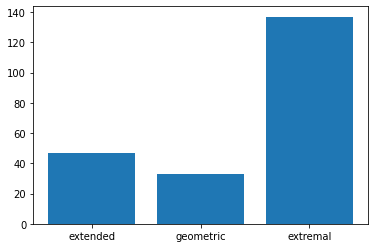

In [7]:
visual = Visualization()
Visualization.plot_quadruple_diff(result_trad, result_extended, result_geometric, result_extremal)

-----

# 4. Conclusion

It turned out that over 120 out of 322 quadruples the extremal approach generated were different from the quadruples generated by the traditional approach. On the other hand, in the cases of the extended approach and the geometric approach, there was around 10 percent of quadruples that were different from the traditional approach's results. Further analysis is needed to determine whether these differences add value to arbitrage trading.<br> 



----

# Reference

[1] Statistical arbitrage with vine copulas, FAU Discussion Papers in Economics, No. 11/2016, Friedrich-Alexander-Universität Erlangen-Nürnberg, Institute for Economics, Nürnberg <br> 
[2] A multivariate rank test of independence based on a multiparametric polynomial copula, IWQW Discussion Papers, No. 10/2015, Friedrich- Alexander-Universität Erlangen-Nürnberg, Institut für Wirtschaftspolitik und Quantitative Wirtschaftsforschung (IWQW), Nürnberg <br>
[3] Justin Bedo, Cheng Soon Ong, Multivariate Spearman’s ρ for Aggregating Ranks Using Copulas (2016) <br>
[4] Mark S. Tenney, Introduction to Copulas (2003) <br>
[5] Roger B. Nelsem, Properties and applications of copulas: A brief survey <br>